In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Etude 


$ f(x_1, x_2) = \exp(x_1 + 3x_2 - 0.1) + \exp(x_1 - 3x_2 - 0.1) + \exp(-x_1 - 0.1) $


In [60]:
alpha = lambda x  : x@np.array([1, 3]) - .1
beta = lambda x : x@np.array([1, -3]) - .1
gamma = lambda x: -x@np.array([-1, 0]) - .1

cost = lambda x : np.exp(alpha(x)) + np.exp(beta(x)) + np.exp(gamma(x))

gradient = lambda x : np.array([np.exp(alpha(x)) + np.exp(beta(x)) - np.exp(gamma(x)), 3*np.exp(alpha(x)) - 3*np.exp(beta(x))])

hessienne = lambda x : np.array(
    [[np.exp(alpha(x)) + np.exp(beta(x)) + np.exp(gamma(x)), 3*np.exp(alpha(x)) - 3*np.exp(beta(x))], 
     [3*np.exp(alpha(x)) - 3*np.exp(beta(x)),                9*np.exp(alpha(x)) + 9*np.exp(beta(x))]]
     )

xstar = np.array([-np.log(2)/2 , 0])

# Mise en place 

In [61]:
def golden_search(f, a, b, epsilon=10**-4):
    phi = (1 + np.sqrt(5)) / 2
    while b - a > epsilon:
        c = a + (b - a) / (phi + 1)
        d = b - (b - a) / (phi + 1)
        if f(c) < f(d):
            b = d
        else:
            a = c
    return (a + b) / 2


def backtracking(cost, gradient, x, sigma_init=2, c=0.1, roo=0.5):
    dk = -gradient(x)
    while cost(x + sigma_init*dk) >  - c*sigma_init*np.linalg.norm(dk)**2:
        sigma_init = roo*sigma_init
    return sigma_init

def get_step_function(cost, gradient, x, name='golden_search'):
    if name == 'golden_search':
        return golden_search(lambda sigma : cost(x - sigma*gradient(x)), 0, 2)
    elif name == 'backtracking':
        return backtracking(cost, gradient, x)
    else:
        return 1e-4

In [62]:
def steepest_descent(x0,cost,gradient, step_f_name="golden_search", epsilon=1e-2, maxiter=100000):
    xlist = [x0] # list of points
    flist = [cost(x0)] # list of cost function  values
    nlist = [np.linalg.norm(gradient(x0))] # list of gradient norm values
    it = 0
    while nlist[-1] > epsilon:
        x = xlist[-1]
        grad = gradient(x)
        step = get_step_function(cost, gradient, x, name=step_f_name)
        xk = x - step*grad 
        xlist.append(xk)
        flist.append(cost(xk))
        nlist.append(np.linalg.norm(gradient(xk)))
        it += 1
        if it > maxiter:
            break
    return xlist,flist,nlist


Step function:  golden_search


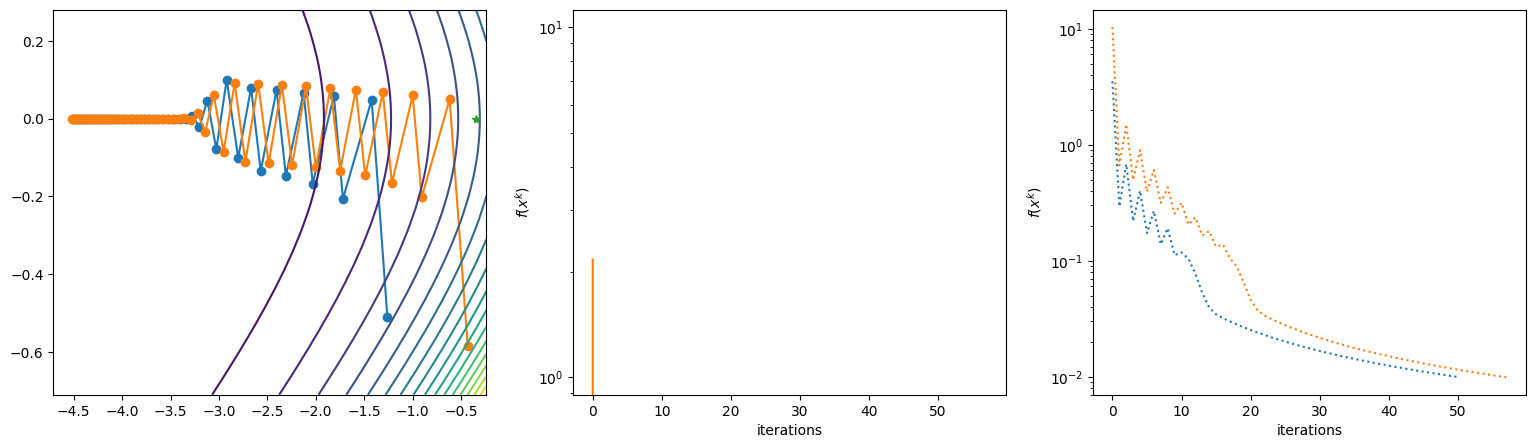

Step function:  backtracking


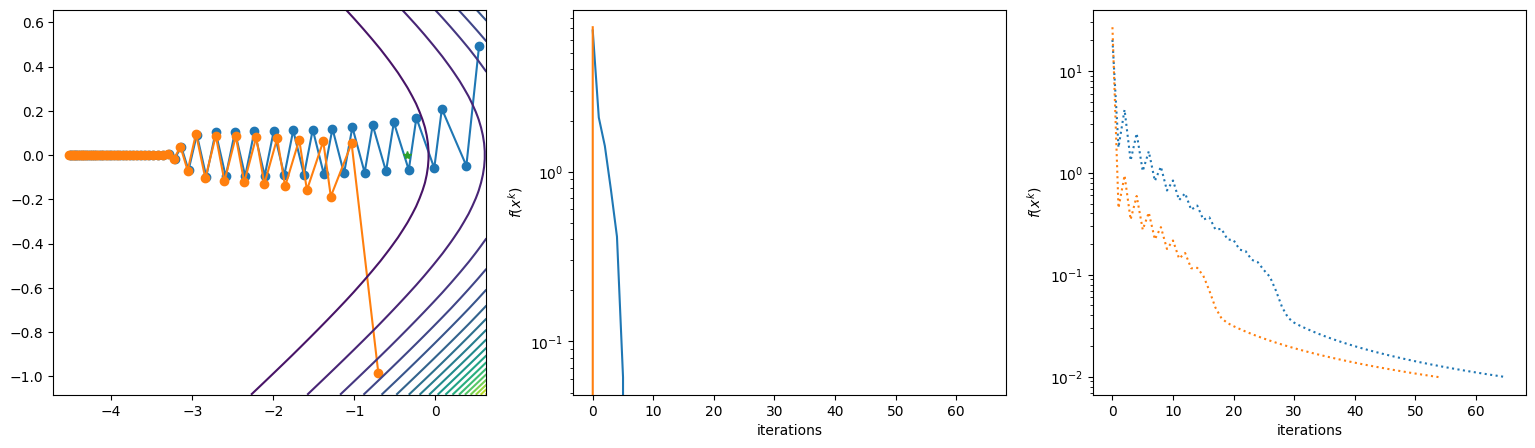

Step function:  constant_step


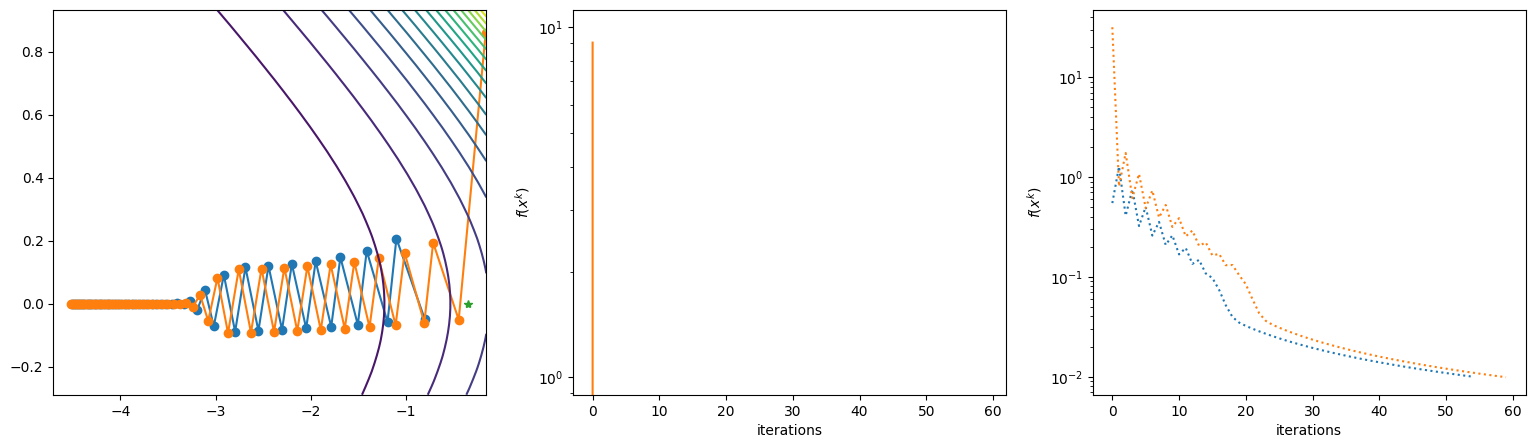

In [63]:
def visualize_gradient_descent(cost, gradient, xstar, step="golden_search", epsilon=1e-4, maxiter=100000):
    fmin  = cost(xstar)

    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]

    for test in range(2):
        x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
        #
        fig = plt.figure(1, figsize=(19,5))
        xlist,flist,nlist =  steepest_descent(x0,cost,gradient,step_f_name="golden_search")
        xlist = np.asarray(xlist)
        #
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
        #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()


step_funtion =  ["golden_search", "backtracking", "constant_step"]

# step_funtion =  ["golden_search"]
for step_f in step_funtion:
    print("Step function: ", step_f)
    visualize_gradient_descent(cost, gradient, xstar, step=step_f)

## Probleme quadratique

In [64]:
from CheckSteepestDescent_partial import get_cost,get_gradient, quadratic_problem2d

In [65]:
P,q,r= quadratic_problem2d(np.array([1, 5]))
# check solution existency 
cost = get_cost(P,q,r)
gradient = get_gradient(P,q)
xstar = -np.dot(np.linalg.inv(P),q)

Step function:  golden_search


/tmp/ipykernel_12860/2118411826.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))


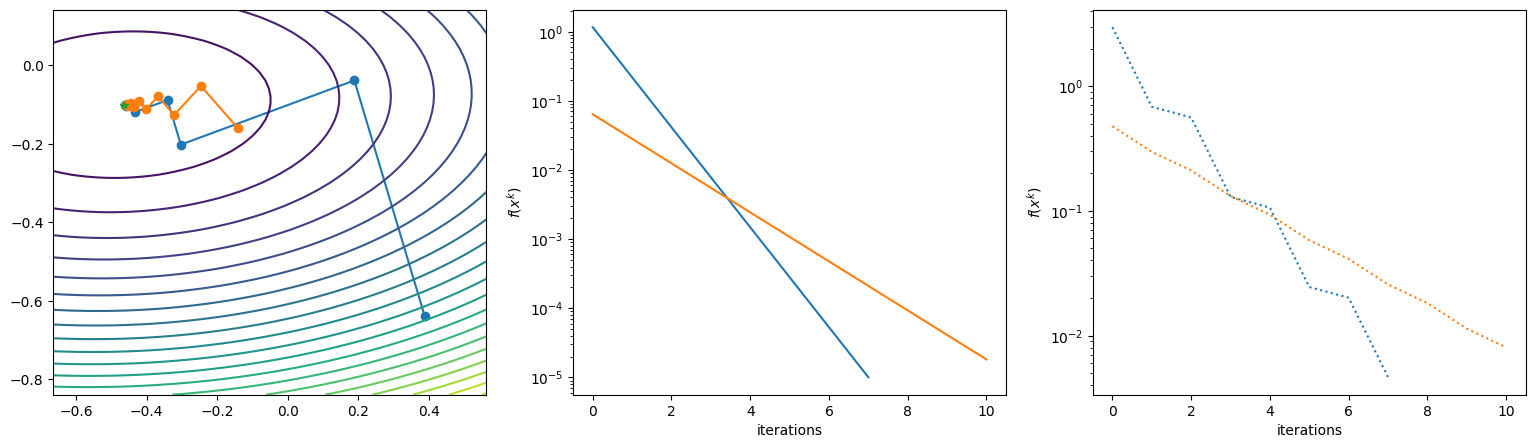

Step function:  backtracking


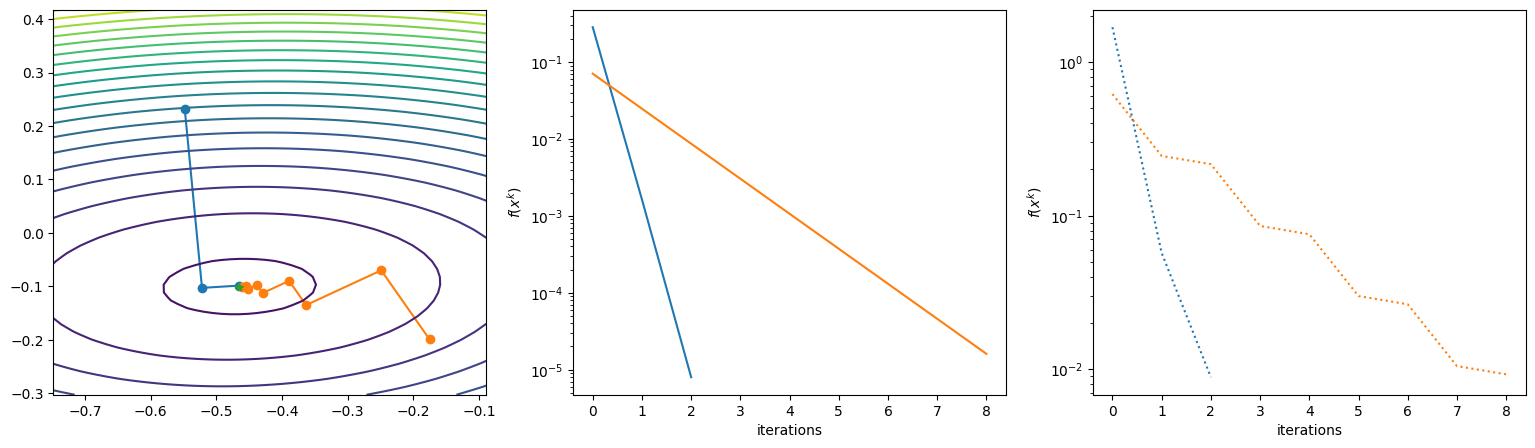

Step function:  constant_step


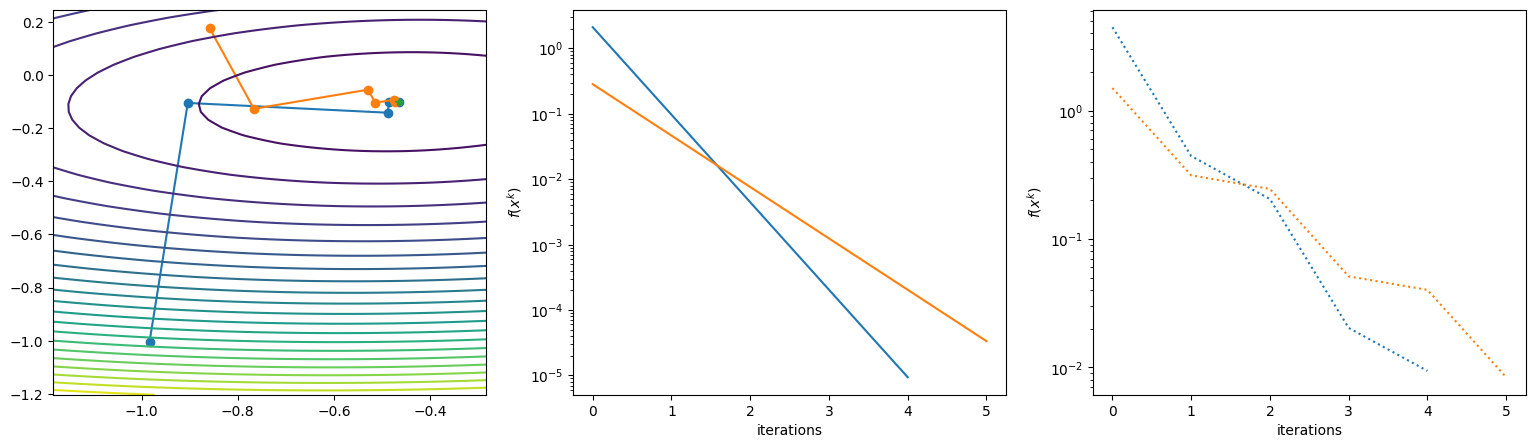

In [66]:
for step_f in step_funtion:
    print("Step function: ", step_f)
    visualize_gradient_descent(cost, gradient, xstar, step=step_f)